# EDA on Titanic Data Set

# Loading the libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sns

# Importing the data

In [2]:
data=pd.read_csv('D:\\Edu\\Datasets\\titanic\\train.csv')

# Size of data

In [3]:
print("Train: rows:{} columns:{}".format(data.shape[0], data.shape[1]))

Train: rows:891 columns:12


# Statistical characteristics:

In [98]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we can see the 5 number summary of all the numerical columns.Also the minimum and maximum values show us the range of values in each columns.

In [5]:
data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"O'Brien, Mr. Timothy",male,1601,G6,S
freq,1,577,7,4,644


Here we can see the characteristics of object type data.

# Information about the data:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


It shows us the information for each column on data type and the number of null values.
    * Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
    * Numerical Features: Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
    * Alphanumeric Features: Ticket, Cabin

# Bar Plots

Percentage of females survived: 74.20382165605095
Percentage of males survived: 18.890814558058924


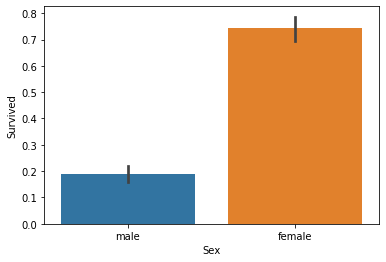

In [10]:
sns.barplot(data["Sex"], data["Survived"])

print("Percentage of females survived:", data["Survived"][data["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males survived:", data["Survived"][data["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

This bar plot shows that ~74% female passenger survived while only ~18% male passenger survived.

Percentage of 1st class who survived: 62.96296296296296
Percentage of 2nd class who survived: 47.28260869565217
Percentage of 3rd class who survived: 24.236252545824847


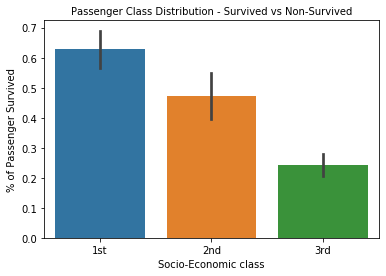

In [15]:
sns.barplot(data["Pclass"], data["Survived"])
plt.title("Passenger Class Distribution - Survived vs Non-Survived", fontsize = 10)
plt.xlabel("Socio-Economic class")
plt.ylabel("% of Passenger Survived")
labels = ['1st', '2nd', '3rd']
val = [0,1,2] 
plt.xticks(val, labels);

print("Percentage of 1st class who survived:", data["Survived"][data["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of 2nd class who survived:", data["Survived"][data["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of 3rd class who survived:", data["Survived"][data["Pclass"] == 3].value_counts(normalize = True)[1]*100)

1. 62% first class passenger survived titanic tragedy, while
2. 47% second class and
3. only 24% third class passenger survived.

The rich people mostly stayed in the upper decks of the ship, which would have been easier for evacuation.

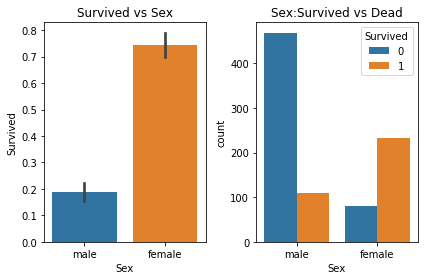

In [29]:
plt.subplot(1,2,1)
sns.barplot(data['Sex'],data['Survived'])
plt.title('Survived vs Sex')
plt.subplot(1,2,2)
sns.countplot('Sex',hue='Survived',data=data)
plt.title('Sex:Survived vs Dead')
plt.tight_layout()

The survival rates for a women on the ship is around 75% while that for men in around 18-19%.


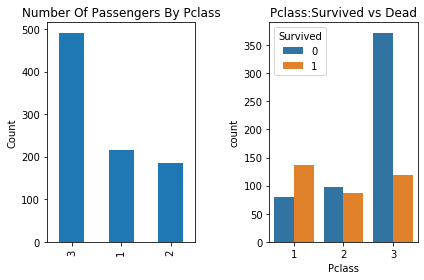

In [40]:
plt.subplot(1,2,1)
data['Pclass'].value_counts().plot.bar()
plt.title('Number Of Passengers By Pclass')
plt.ylabel('Count')
plt.subplot(1,2,2)
sns.countplot('Pclass',hue='Survived',data=data)
plt.title('Pclass:Survived vs Dead')
plt.tight_layout()

The Passengers Of Pclass 1 were given high priority while rescue than the other passengers in other Pclass.

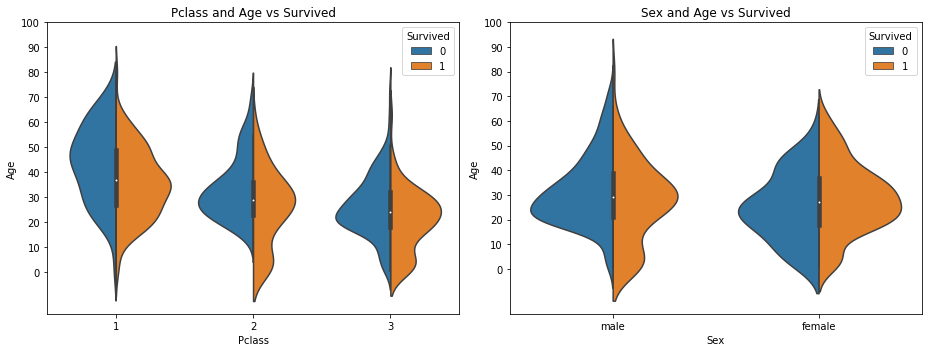

In [49]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True)
plt.title('Pclass and Age vs Survived')
plt.yticks(range(0,110,10))
plt.subplot(1,2,2)
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True)
plt.title('Sex and Age vs Survived')
plt.yticks(range(0,110,10))
plt.tight_layout()

We can see that Survival chances for Passenegers aged 20-50 from Pclass1 is high.

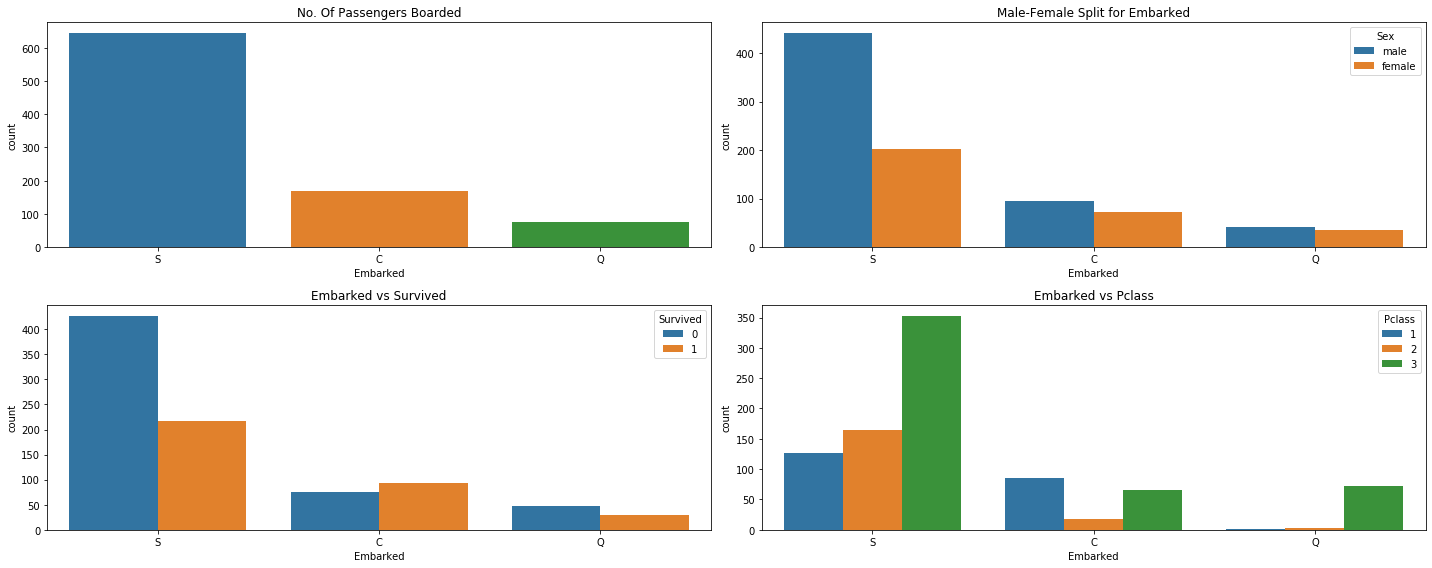

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
sns.countplot('Embarked',data=data)
plt.title('No. Of Passengers Boarded')

plt.subplot(2,2,2)
sns.countplot('Embarked',hue='Sex',data=data)
plt.title('Male-Female Split for Embarked')
plt.tight_layout()

plt.subplot(2,2,3)
sns.countplot('Embarked',hue='Survived',data=data)
plt.title('Embarked vs Survived')
plt.tight_layout()

plt.subplot(2,2,4)
sns.countplot('Embarked',hue='Pclass',data=data)
plt.title('Embarked vs Pclass')
plt.show()

plt.tight_layout()

Maximum passenegers boarded from S. Majority of them being from Pclass3.

Among the passengers boarded from Port Q ,almost 95% of them were from Pclass3.

# Box PLot

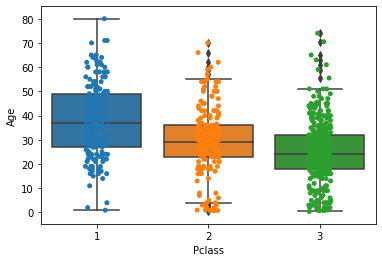

In [56]:
ax= sns.boxplot(x="Pclass", y="Age", data=data)
ax= sns.stripplot(x="Pclass", y="Age", data=data, jitter=True, edgecolor="gray")
plt.show()

Average age goes down from class 1 to class 3.

We can also see Outliers in Pclass 2 and Pclass 3

# Categorical vs. Categorical


### Stacked bar chart

Survived    0    1
Sex               
female     81  233
male      468  109


Text(0, 0.5, 'Survival Percentage')

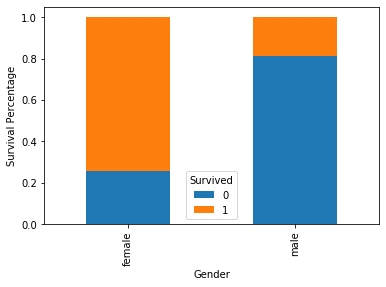

In [59]:
tab = pd.crosstab(data['Sex'], data['Survived'])
print(tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Gender')
plt.ylabel('Survival Percentage')

 In the above graph '0' and '1' represents Survived and Dead respectively. Which also shows more males have survived than female.   

# Quantitative vs. Quantitative

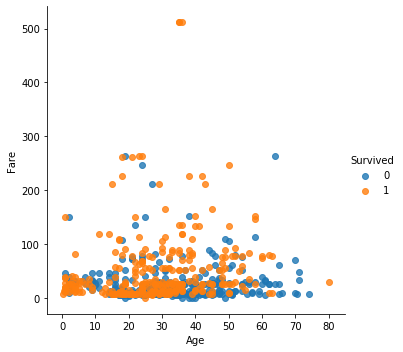

In [60]:
sns.lmplot(x='Age', y='Fare', hue='Survived', 
           data=data.loc[data['Survived'].isin([1,0])], 
           fit_reg=False)

Scatter plot shows us the realtion between Two Quantitative variables,here both the variables dosent have any significant relation. 

# Heatmap

In [65]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


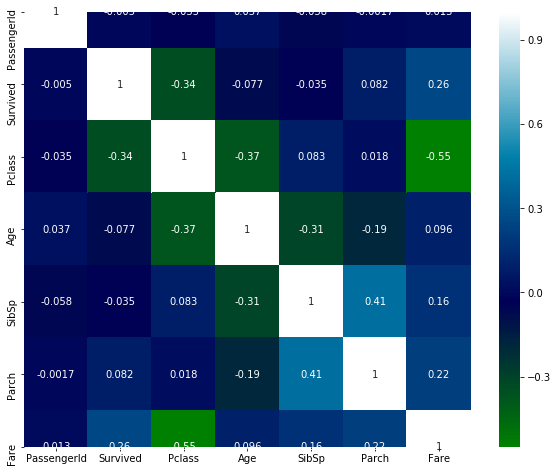

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap="ocean",annot=True)

Fare feature seems to have a significative correlation with the survival probability.

# Pairplot

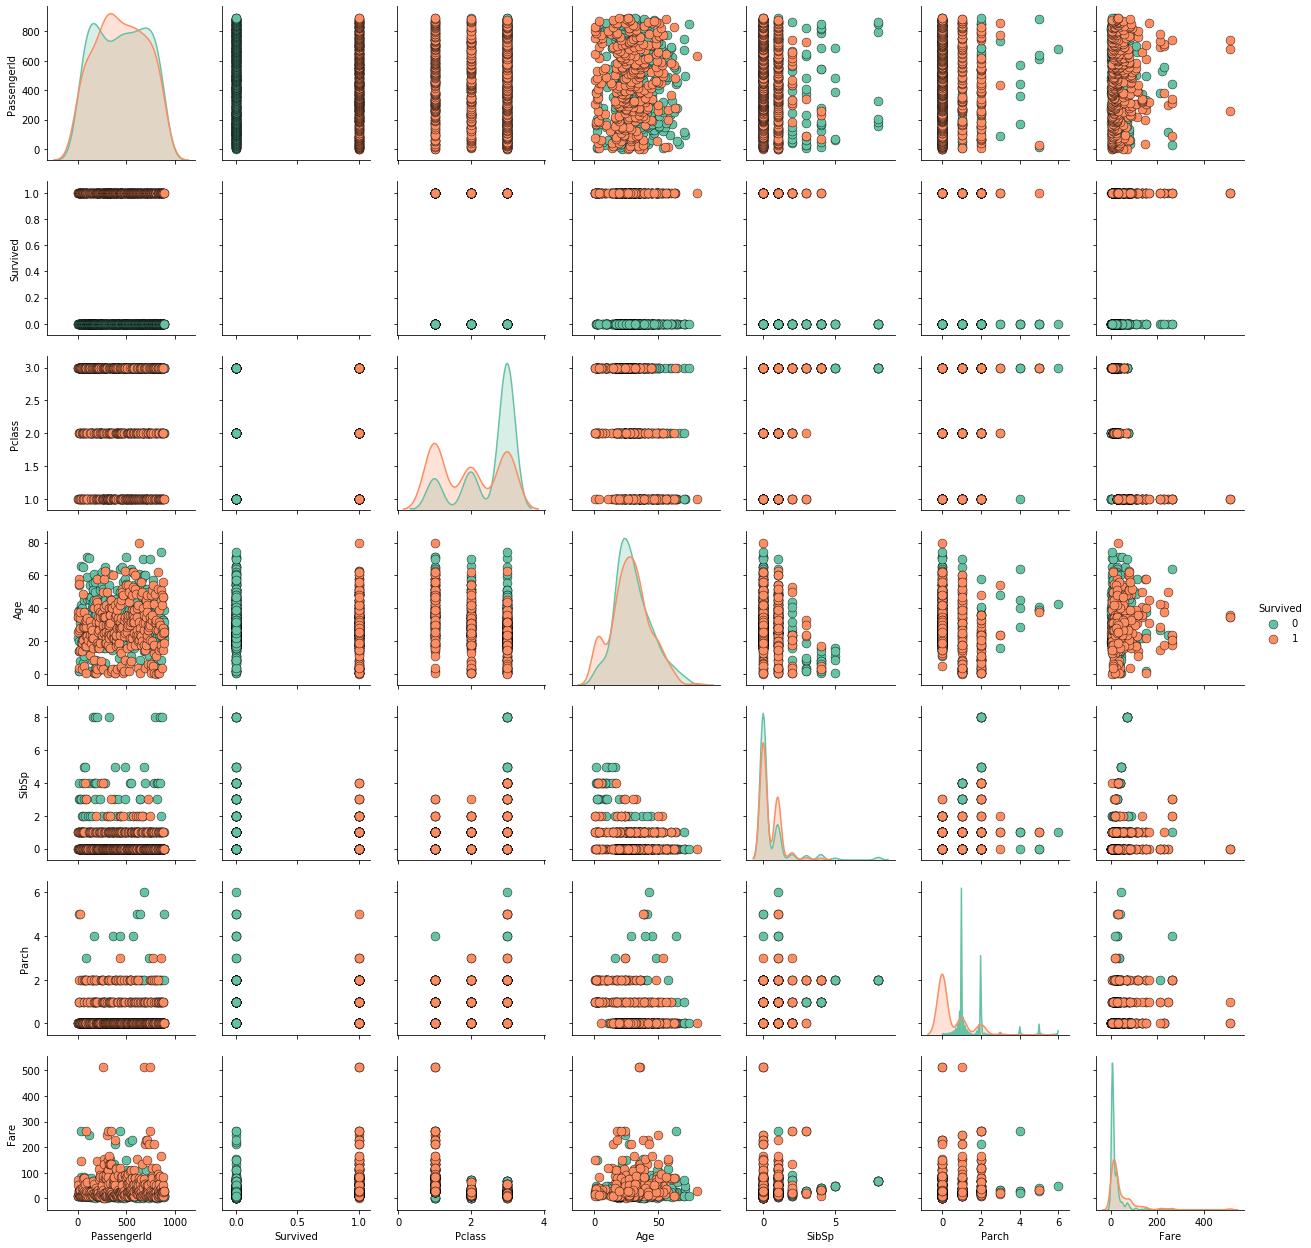

In [67]:
sns.pairplot(data, kind="scatter", hue="Survived", palette="Set2",plot_kws=dict(s=80, edgecolor="black", linewidth=0.4))

A scatter plot is used to do bi-variant analysis and find the corelation betwwent the various features.

Here we can see that Age has correlation with fare.   